In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv("Speed+Dating+Data.csv", encoding='latin1')

C:\Users\adela\AppData\Local\Temp\ipykernel_24700\1253941298.py:1: DtypeWarning: Columns (49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Speed+Dating+Data.csv", encoding='latin1')


In [5]:
cols = [
    'match', 'dec', 'dec_o', 'gender', 'order', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
    'age', 'age_o', 'race', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
    'you_call', 'them_cal', 'numdat_2', 'date', 'go_out'
]
df = df[cols]
df = df.dropna(subset=['match', 'dec', 'gender'])  # Nettoyage des lignes clés
df['gender'] = df['gender'].map({0: 'female', 1: 'male'})  # Remapper le genre

### Statistiques descriptives

In [6]:
# Taux de match
match_rate = df['match'].mean()
print(f"Taux de match réciproque : {match_rate:.2%}")

# Décision individuelle
decision_rate = df['dec'].mean()
print(f"Taux de 'oui' individuel à un second date : {decision_rate:.2%}")

# Moyenne des critères notés
df[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].describe()

Taux de match réciproque : 16.47%
Taux de 'oui' individuel à un second date : 44.62%


,attr,sinc,intel,fun,amb,shar
count,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000
mean,6.178620,7.157388,7.367731,6.405580,6.780003,5.478526
std,1.963337,1.763356,1.549820,1.954842,1.796359,2.157484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000
50%,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Visualisation et analyse

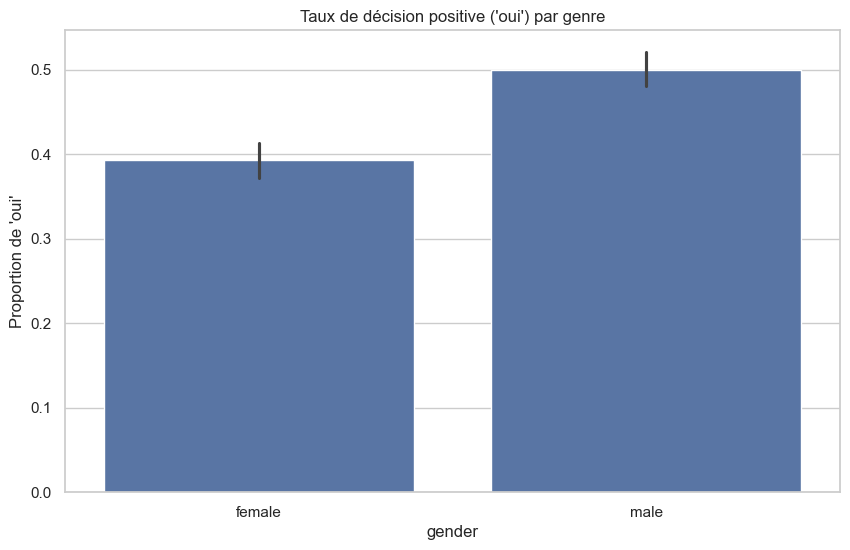

In [7]:
sns.barplot(x='gender', y='dec', data=df)
plt.title("Taux de décision positive ('oui') par genre")
plt.ylabel("Proportion de 'oui'")
plt.show()

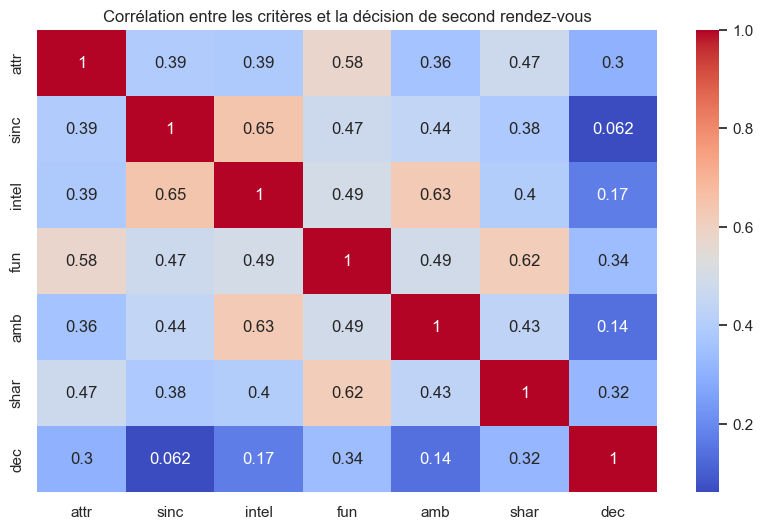

In [8]:
features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
sns.heatmap(df[features + ['dec']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les critères et la décision de second rendez-vous")
plt.show()

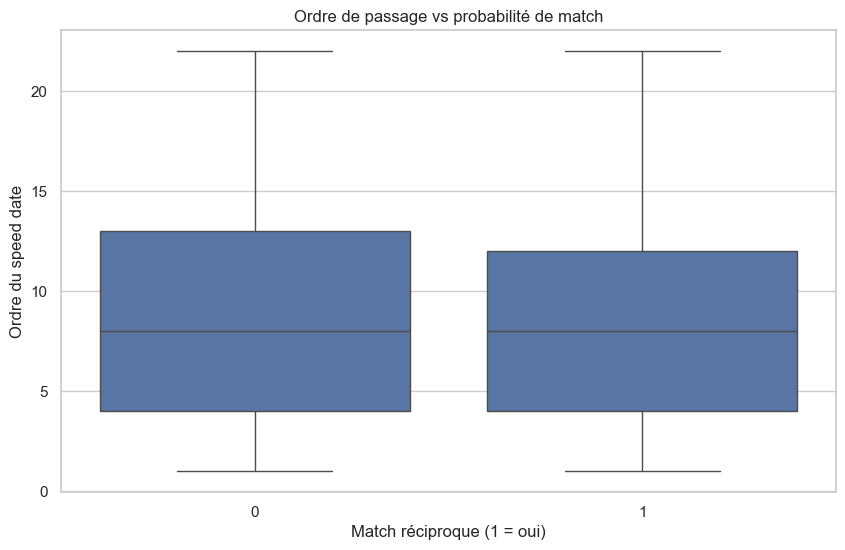

In [9]:
sns.boxplot(x='match', y='order', data=df)
plt.title("Ordre de passage vs probabilité de match")
plt.xlabel("Match réciproque (1 = oui)")
plt.ylabel("Ordre du speed date")
plt.show()

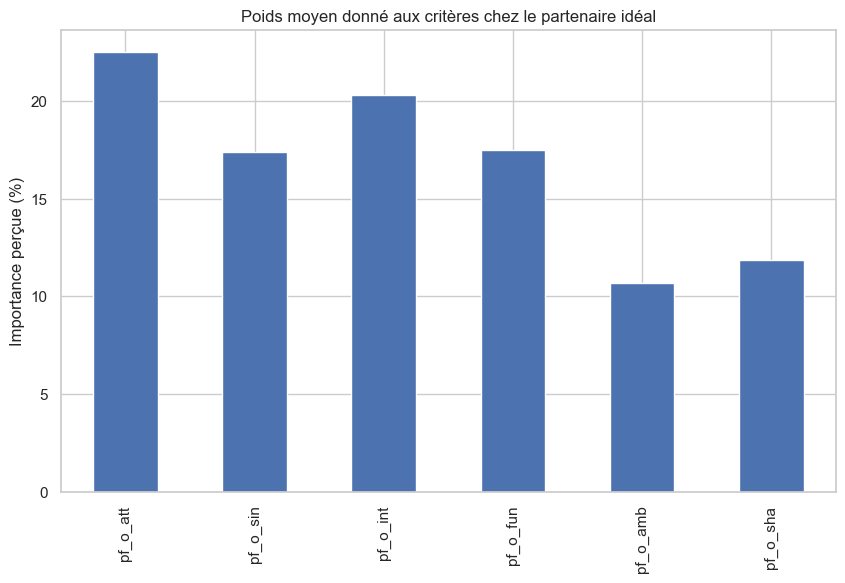

In [10]:
prefs = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
df[prefs].mean().plot(kind='bar')
plt.title("Poids moyen donné aux critères chez le partenaire idéal")
plt.ylabel("Importance perçue (%)")
plt.show()

### Réponse à la question : qu'est ce qui fait que les personnes s'interessent entre elles ? 

In [11]:
df_male = df[df['gender'] == 'male']
df_female = df[df['gender'] == 'female']

print("Moyennes notées par les femmes sur les hommes :")
print(df_male[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].mean())

print("\nMoyennes notées par les hommes sur les femmes :")
print(df_female[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].mean())

Moyennes notées par les femmes sur les hommes :
attr     6.456853
sinc     7.221769
intel    7.287515
fun      6.523839
amb      6.611082
shar     5.542533
dtype: float64

Moyennes notées par les hommes sur les femmes :
attr     5.899706
sinc     7.093118
intel    7.448105
fun      6.286553
amb      6.949895
shar     5.412833
dtype: float64


In [12]:
print(df[['shar', 'race', 'race_o', 'match']].corr())

            shar      race    race_o     match
shar    1.000000  0.007086 -0.051351  0.270371
race    0.007086  1.000000  0.034654 -0.013268
race_o -0.051351  0.034654  1.000000 -0.013088
match   0.270371 -0.013268 -0.013088  1.000000


In [13]:
# Corrélation entre la perception d’attractivité que pense avoir (pf_o_att)
# et la note réelle reçue (attr)
df[['pf_o_att', 'attr']].corr()


,pf_o_att,attr
pf_o_att,1.000000,0.050855
attr,0.050855,1.000000


🧾 Recommandations :

1. L'attractivité est le facteur le plus important pour une décision positive, suivie par l'humour.
2. Les gens surestiment souvent des critères comme l'intelligence ou la sincérité.
3. Les intérêts communs comptent plus que la race pour les matchs.
4. L'ordre des rendez-vous a un léger effet : les premiers ont plus de succès.
5. Les préférences déclarées (questionnaire) ne reflètent pas toujours la réalité des décisions.

🎯 Suggestion :
Mettre en avant les centres d'intérêt communs et l'humour dans les profils pourrait augmenter les matchs.